In [1]:
import tensorflow as tf
import numpy as np
import IPython.display as display
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import time
import io
import os
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
from helpers.deployment_wrapper import *
from helpers.feature_extraction import *
from helpers.architecture import *
from helpers.hypertuner import * 
from helpers.viz_funcs import *
%load_ext autoreload
%autoreload 2

In [3]:
style_imgs = os.listdir("imgs/style")
content_imgs = os.listdir("imgs/content")

In [4]:
content_path = "imgs/content/portrait.jpg"

style_path = "imgs/style/paintglob.jpg"

In [5]:
content_img = load_img(content_path)
style_img = load_img(style_path)

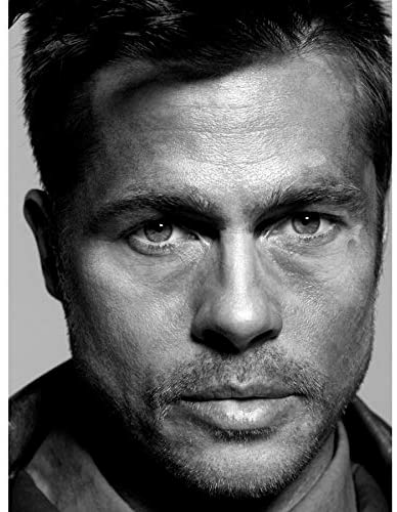

In [6]:
viz_tensor(content_img)

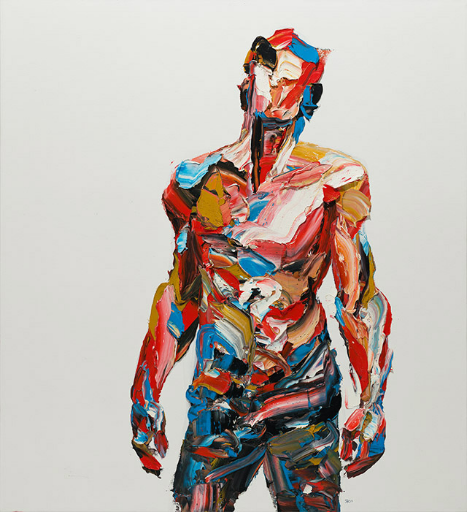

In [7]:
viz_tensor(style_img)

In [8]:
# ST_img = run_style_transfer(content_img, style_img,
#                        content_layers = base_content_layers,
#                        style_layers = base_style_layers,
#                        n_epochs=5, n_steps_per_epoch=25, 
#                        lr = 0.005, decay = 1e-4,
#                        alpha=1, beta=100)

In [9]:
# viz_tensor(ST_img)

In [10]:
from helpers.arch_objects import * 
from helpers.image_objects import *

In [11]:
arch = arch_obj(optimizer = tf.optimizers.Adam, learning_rate = 0.005,
                 n_epochs=5, n_steps_per_epoch=25, decay = 1e-5) 

In [12]:
content_object = image_obj(content_path, img_type = 'content',
                           feature_layers = exp_content_layers,
                           feature_vector = exp_content_weights, color_adj = False)
style_object = image_obj(style_path, img_type = 'style',
                         feature_layers = exp_style_layers,
                         feature_vector = exp_style_weights, color_adj = False) 

feature_extractor is now set...
feature_extractor is now set...


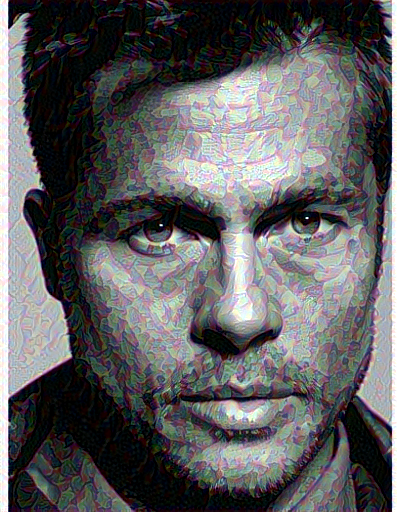

Epoch: 0


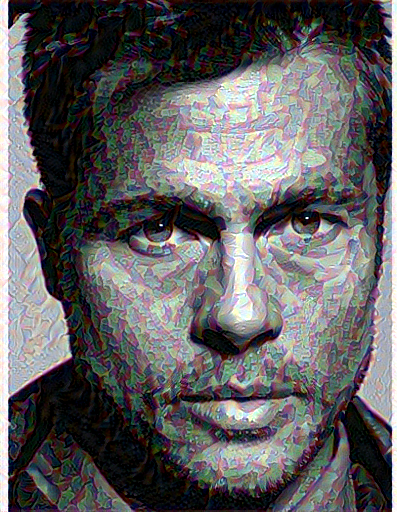

Epoch: 1


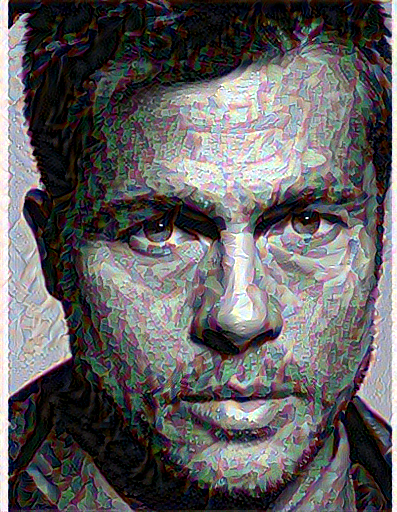

Epoch: 2


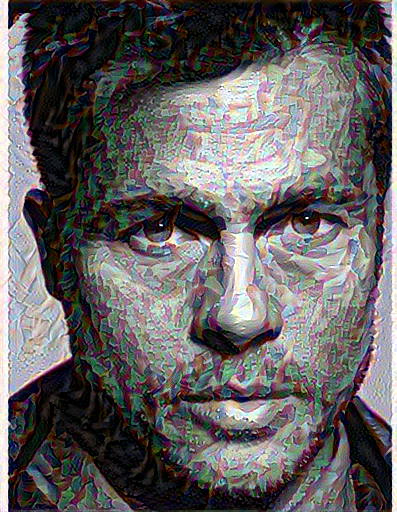

Epoch: 3


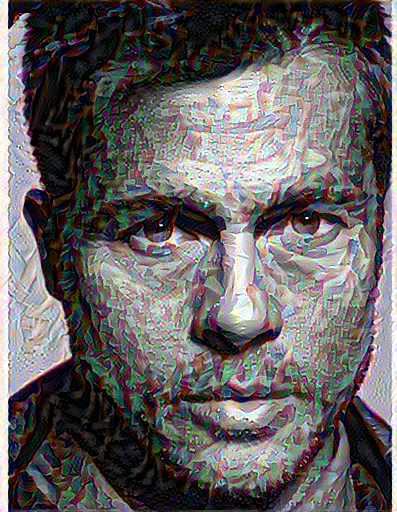

Epoch: 4
Total time: 39.1


In [13]:
final_img = arch.run_network(content_object, style_object)

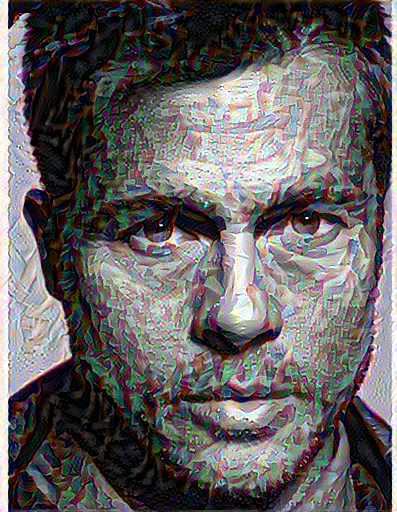

In [14]:
viz_tensor(arch.final_img)

In [15]:
numpy_image = arch.final_img.numpy()

In [16]:
PIL_image = Image.fromarray(np.uint8(numpy_image[0]*255)).convert('RGB')

In [17]:
# PIL_image.save('bradpitt.jpg')